# The Golden Gloves
## Topic - Using historical data to predict MLB Hall of Fame status.
#### Data Source - https://www.seanlahman.com/baseball-archive/statistics/  
#### Group Hypothesis - Stats affect 
#### Approach to use for analysis - Aggregate stats for each player in regard to batting, fielding, and pitching. Using this data we can attempt to predict hall of fame status using a classificication machine learning method.

In [184]:
# Importing necessary packages
import pandas as pd


In [185]:
# Pandas setup
pd.set_option('display.max_columns', None)


# Hall of Fame Data
Providing example of how two tables could be combined to create a more readble hall of fame table.

In [186]:
# Importing data
people_df = pd.read_csv("Resources/baseballdatabank-master/core/People.csv")
hall_of_fame_df = pd.read_csv("Resources/baseballdatabank-master/core/HallOfFame.csv")

In [187]:
people_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [188]:
hall_of_fame_df.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [189]:
# Example merge and selecting necessary columns
hof_merged_df = pd.merge(hall_of_fame_df, people_df)
hof_merged_df = hof_merged_df[['playerID','nameLast', 'nameGiven', 'inducted', 'votes', 'yearID', 'needed']]

In [190]:
temp_df = hof_merged_df.loc[hof_merged_df['votes'] > 170]
temp_df.sort_values('votes', ascending=False)

,playerID,nameLast,nameGiven,inducted,votes,yearID,needed
4082,maddugr01,Maddux,Gregory Alan,Y,555.0,2014,429.0
3879,ripkeca01,Ripken,Calvin Edwin,Y,537.0,2007,409.0
4109,johnsra05,Johnson,Randall David,Y,534.0,2015,412.0
3880,gwynnto01,Gwynn,Anthony Keith,Y,532.0,2007,409.0
4083,glavito02,Glavine,Thomas Michael,Y,525.0,2014,429.0
...,...,...,...,...,...,...,...
2633,foxne01,Fox,Jacob Nelson,N,174.0,1979,324.0
2637,foxne01,Fox,Jacob Nelson,N,173.0,1983,281.0
3690,morrija02,Morris,John Scott,N,172.0,2005,387.0
3799,smithle02,Smith,Lee Arthur,N,171.0,2014,429.0


In [191]:
# Narrowing down dataset to those that barely made/missed HOF status
temp_df = hof_merged_df.loc[(hof_merged_df['votes'] > 140) & (hof_merged_df['votes'] < 200)] 
temp_df.sort_values('needed', ascending=False, inplace=True)
temp_df

C:\Users\alex\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,playerID,nameLast,nameGiven,inducted,votes,yearID,needed
3948,martied01,Martinez,Edgar,N,191.0,2011,436.0
3769,trammal01,Trammell,Alan Stuart,N,141.0,2011,436.0
4049,bondsba01,Bonds,Barry Lamar,N,198.0,2014,429.0
3799,smithle02,Smith,Lee Arthur,N,171.0,2014,429.0
4037,schilcu01,Schilling,Curtis Montague,N,167.0,2014,429.0
...,...,...,...,...,...,...,...
250,chancfr01,Chance,Frank Leroy,N,144.0,1946,NaN
482,gehrich01,Gehringer,Charles Leonard,Y,159.0,1949,NaN
1504,ruffire01,Ruffing,Charles Herbert,N,184.0,1964,NaN
1898,applilu01,Appling,Lucius Benjamin,Y,189.0,1964,NaN


# Career Batting Data
Providing a general exmaple of how batting data could be used.

In [192]:
# Importing data
batting_df = pd.read_csv("Resources/baseballdatabank-master/core/batting.csv")

In [193]:
batting_df.drop(columns=['yearID', 'teamID', 'IBB', 'HBP', 'SH', 'SF', 'stint', 'lgID'], inplace=True)
batting_df.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,GIDP
0,abercda01,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
1,addybo01,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,0.0
2,allisar01,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,1.0
3,allisdo01,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,0.0
4,ansonca01,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,0.0


In [194]:
# Grouping by playerID and yearID, then sorting by home runs by season
career_batting_df = batting_df.groupby(['playerID']).sum()

In [195]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with fielding and pitching
career_batting_df = career_batting_df.add_prefix('b_')

In [196]:
# Sorting dataframe by most home runs
career_batting_df.sort_values('b_HR', ascending=False)

,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP
playerID,,,,,,,,,,,,,
bondsba01,2986,9847,2227,2935,601,77,762,1996.0,514.0,141.0,2558,1539.0,165.0
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,328.0
ruthba01,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0
rodrial01,2784,10566,2021,3115,548,31,696,2086.0,329.0,76.0,1338,2287.0,261.0
pujolal01,2862,10839,1843,3236,669,16,662,2100.0,114.0,41.0,1331,1304.0,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
howarch02,44,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
howarda01,25,36,6,8,1,0,0,1.0,0.0,0.0,1,8.0,0.0
howarea01,1,0,0,0,0,0,0,1.0,0.0,0.0,0,0.0,0.0


In [197]:
# Showing batting stats of specified player
career_batting_df.loc['bondsba01']

b_G       2986.0
b_AB      9847.0
b_R       2227.0
b_H       2935.0
b_2B       601.0
b_3B        77.0
b_HR       762.0
b_RBI     1996.0
b_SB       514.0
b_CS       141.0
b_BB      2558.0
b_SO      1539.0
b_GIDP     165.0
Name: bondsba01, dtype: float64

# Career Fielding Data

In [198]:
# Importing data
fielding_df = pd.read_csv("Resources/baseballdatabank-master/core/Fielding.csv")

In [199]:
# Dropping inconsistent columns
fielding_df.drop(['lgID', 'PB', 'WP', 'SB', 'CS', 'ZR'], axis=1, inplace=True)

# Dropping unnecessary columns
fielding_df.drop(['yearID', 'stint', 'teamID', 'POS'], axis=1, inplace=True)


In [200]:
# Grouping by playerID to get career stats
career_fielding_df = fielding_df.groupby(['playerID']).sum()

In [201]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_fielding_df = career_fielding_df.add_prefix('f_')

In [202]:
career_fielding_df.head()

,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP
playerID,,,,,,,
aardsda01,331,0.0,1011.0,11,29,3.0,2
aaronha01,3020,2977.0,78414.0,7436,429,144.0,218
aaronto01,387,206.0,6472.0,1317,113,22.0,124
aasedo01,448,91.0,3328.0,67,135,13.0,10
abadan01,9,4.0,138.0,37,1,1.0,3


# Career Pitching Data

# Creating Full Dataset containing:
* Hall of Fame Players (playerID, inductedStatus)
* Career Batting Data
* Career Fielding Data
* Career Pitching Data

In [203]:
# Merging all relevant datasets

# Merging hall of fame and batting dataframes
train_df = pd.merge(hall_of_fame_df, career_batting_df, left_on='playerID', right_on='playerID')

# Appending fielding data
train_df = pd.merge(train_df, career_fielding_df, left_on='playerID', right_on='playerID')

In [204]:
# Cleaning data table
train_df = train_df.drop(['playerID', 'yearID', 'votedBy', 'category', 'needed_note', 'needed', 'ballots', 'votes'], axis=1)
train_df = train_df.dropna()

In [205]:
train_df.head()

,inducted,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP
0,Y,3035,11436,2247,4189,724,295,117,1944.0,896.0,178.0,1249,608.0,0.0,2954,725.0,19266.0,6507,410,278.0,113
1,Y,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0,2436,0.0,0.0,4787,569,179.0,86
2,Y,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963
3,N,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963
4,Y,647,1687,151,362,50,12,7,165.0,20.0,1.0,116,218.0,0.0,643,266.0,10032.0,313,1506,57.0,44


# Machine Learning
Using classification to predict inductedStatus based on all stats within dataset.

In [206]:
# Importing required packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [207]:
# assigning data
X = train_df[['inducted']]
y = train_df.drop(['inducted'], axis=1)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.25, random_state=0)

In [208]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data using standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [209]:
# Creating and fitting logistic regression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
result = logisticRegr.fit(X_train_scaled, y_train.values.ravel())

In [210]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.48640776699029126


In [211]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

predictions = logisticRegr.predict(X_test)

cm = confusion_matrix(y_test, predictions)

print(cm)

[[459 505]
 [ 24  42]]


In [212]:
# Display coefficients of values considered by model
import numpy as np
coefficients = pd.concat([pd.DataFrame(y.columns),pd.DataFrame(np.transpose(logisticRegr.coef_))], axis = 1)
coefficients

,0,0
0,b_G,-0.323661
1,b_AB,-1.033451
2,b_R,0.774998
3,b_H,0.312636
4,b_2B,-0.103363
5,b_3B,0.373427
6,b_HR,0.171993
7,b_RBI,0.370625
8,b_SB,0.045106
9,b_CS,-0.038234


In [213]:
# Displaying classification report of model
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           N       0.95      0.48      0.63       964
           Y       0.08      0.64      0.14        66

    accuracy                           0.49      1030
   macro avg       0.51      0.56      0.39      1030
weighted avg       0.89      0.49      0.60      1030



# Visualizing Model

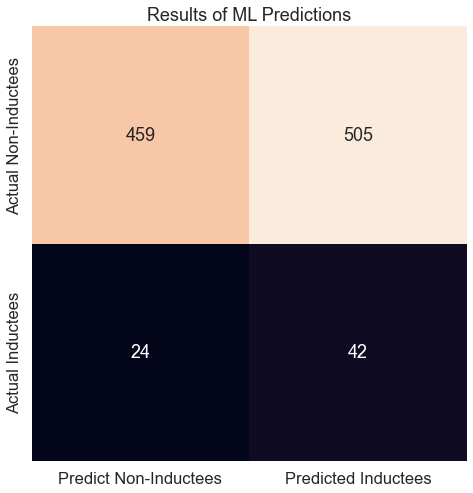

In [217]:
# Creating visual of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.title('Results of ML Predictions')

# Displaying plot
plt.show()